In [2]:
import numpy as np
import pandas as pd

In [20]:
from sklearn.preprocessing import StandardScaler

In [62]:
usda2_cleaned

,County,Pop2010,OHU2010,lapophalf,lalowihalf,laseniorshalf,lawhitehalf,lablackhalf,lahisphalf,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractHispanic,TractHUNV,TractSNAP,medianincome,Overall Food Insecurity Rate
0,Alamance,143068,57178,0.838501,0.789945,0.810017,0.856388,0.801713,0.786946,0.402760,0.231352,0.145162,0.726689,0.180334,0.098226,0.056280,0.155496,0.744902,0.114
1,Alexander,37198,14425,0.936516,0.948627,0.903454,0.940738,0.886656,0.896697,0.376015,0.227243,0.151272,0.895855,0.054922,0.043040,0.034523,0.121041,2.889151,0.116
2,Alleghany,11155,4778,0.956729,0.977289,0.947999,0.961987,0.936469,0.906992,0.474675,0.200359,0.206544,0.922277,0.012550,0.090004,0.038719,0.174882,7.392005,0.158
3,Anson,12632,4912,0.996766,1.039605,0.995725,0.997638,0.995952,0.999995,0.447118,0.251425,0.139170,0.387191,0.572910,0.026124,0.100570,0.164660,6.797231,0.125
4,Ashe,9879,4320,0.960419,0.947398,0.958095,0.963855,0.927710,0.862377,0.442960,0.201741,0.205689,0.963458,0.002632,0.035834,0.071528,0.195384,8.389815,0.131
5,Avery,17797,6664,0.979496,1.168701,0.974053,0.978888,0.997802,0.985155,0.361803,0.171883,0.174018,0.919481,0.039838,0.044783,0.038715,0.144588,5.722989,0.131
6,Beaufort,36357,15339,0.918857,0.929391,0.921723,0.952539,0.820118,0.960320,0.406194,0.212669,0.191297,0.687378,0.249361,0.066562,0.074972,0.167186,2.651477,0.132
7,Bertie,13297,5462,1.000000,1.017813,1.000000,1.000000,1.000000,1.000000,0.481688,0.223283,0.169587,0.370159,0.612168,0.014139,0.080923,0.214520,5.380447,0.141
8,Bladen,3366,1294,0.999993,1.049188,0.999989,0.999991,0.999993,0.999978,0.444444,0.249851,0.134581,0.532383,0.329768,0.138443,0.129830,0.199866,22.822257,0.147
9,Brunswick,60210,25455,0.939090,0.864931,0.945886,0.939301,0.953129,0.895664,0.364823,0.198107,0.197559,0.805946,0.137004,0.050789,0.049578,0.181007,1.844628,0.112


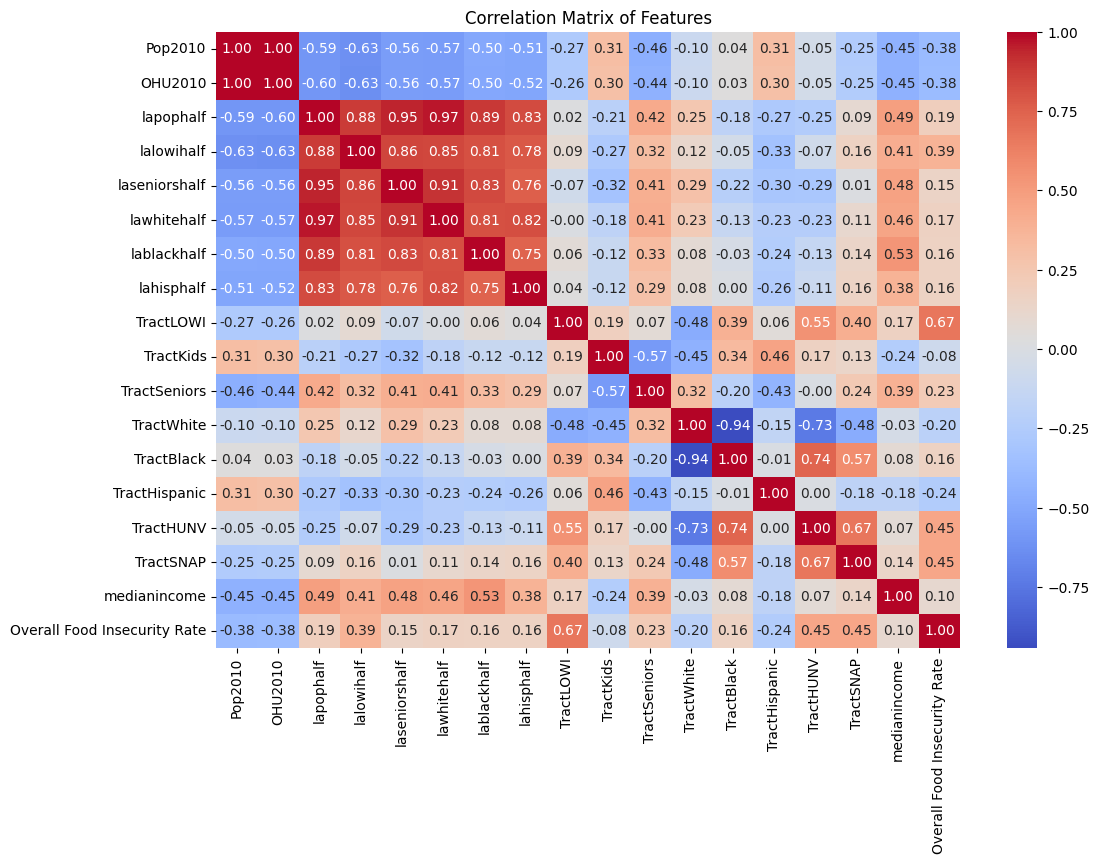

In [64]:

# This time, keeping the predictor variable in the dataset for correlation calculation
correlation_matrix_with_predictor = df_modified.corr()

correlation_matrix_with_predictor

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_predictor, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

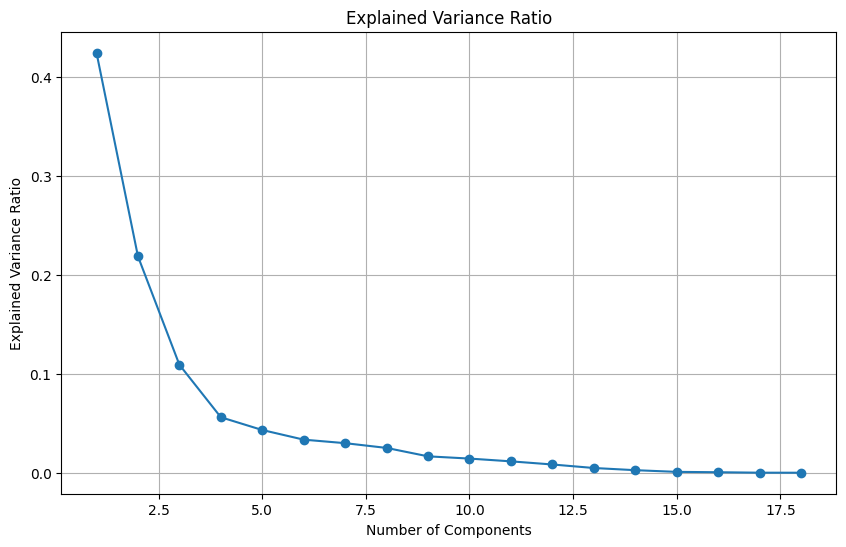

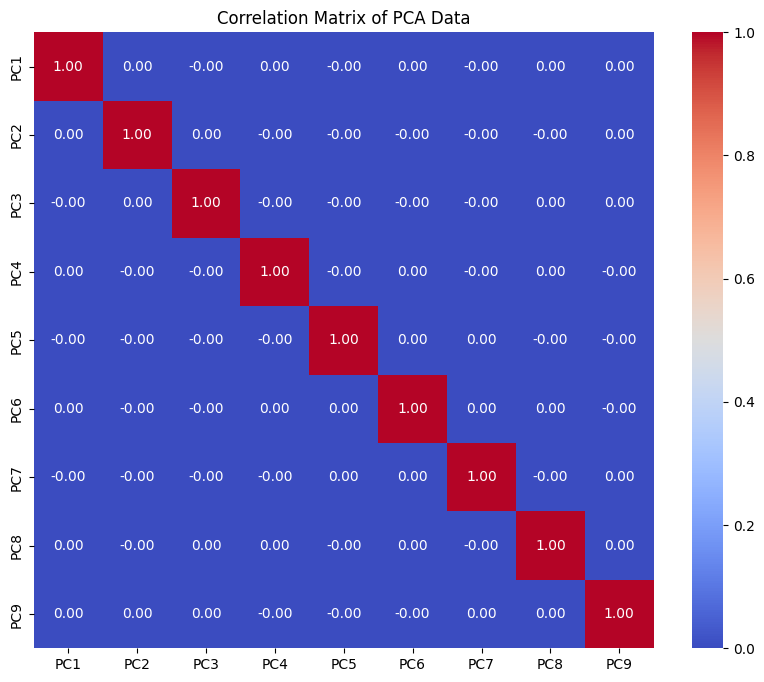

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'scaled_X' is your scaled pandas DataFrame

# Determine the optimal number of components using explained variance ratio
pca = PCA()
pca.fit(data_cleaned)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the optimal number of components
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

# Perform PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_X)

# Create DataFrame from PCA data
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(optimal_components)])

# Create the correlation matrix of the PCA data
pca_correlation_matrix = pca_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PCA Data')
plt.show()


In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'x_scaled' is your pandas DataFrame containing scaled features
# Assuming 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X.iloc[:,:-1], predictor_column, test_size=0.2, random_state=42)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to the training data
ridge_model.fit(X_train, y_train) 
y_bar = ridge_model.predict(X_train)

# Predict on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error: 0.00012671937636553215
R-squared (R2): 0.7128677085259084
Mean Absolute Error (MAE): 0.008203545666209813
Root Mean Squared Error (RMSE): 0.011256970123684798


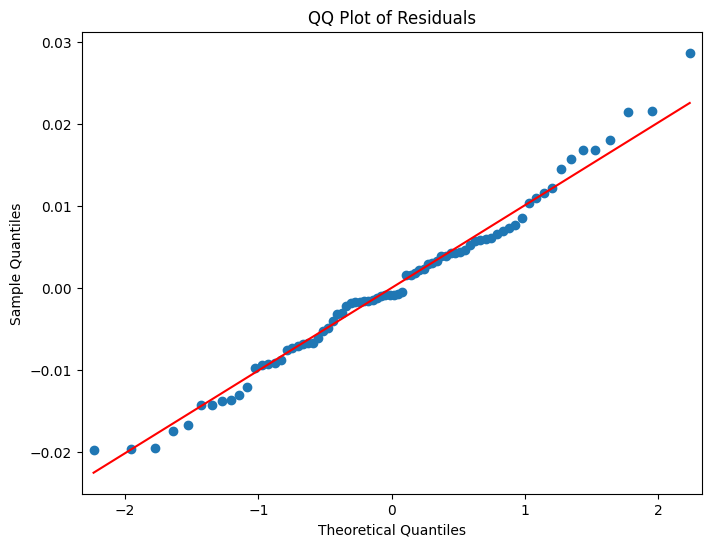

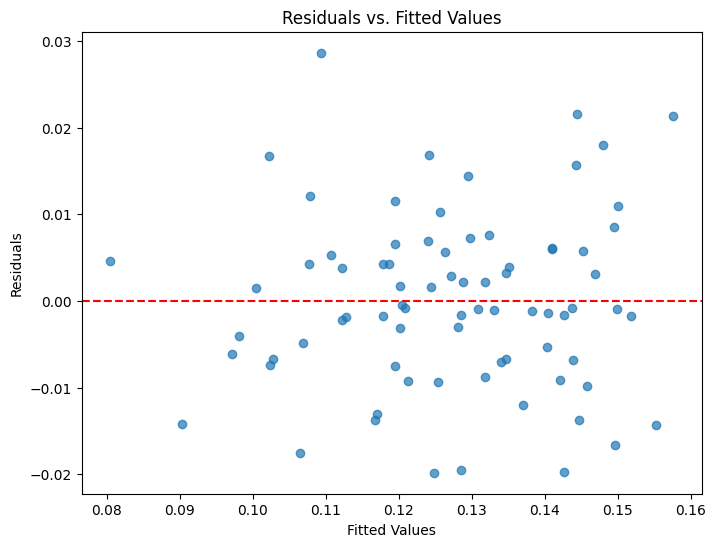

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Assuming y_test and y_pred are your actual and predicted values, respectively

# Calculate residuals
residuals = y_train - y_bar

# Create QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residuals, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Create residual vs. fitted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_bar, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


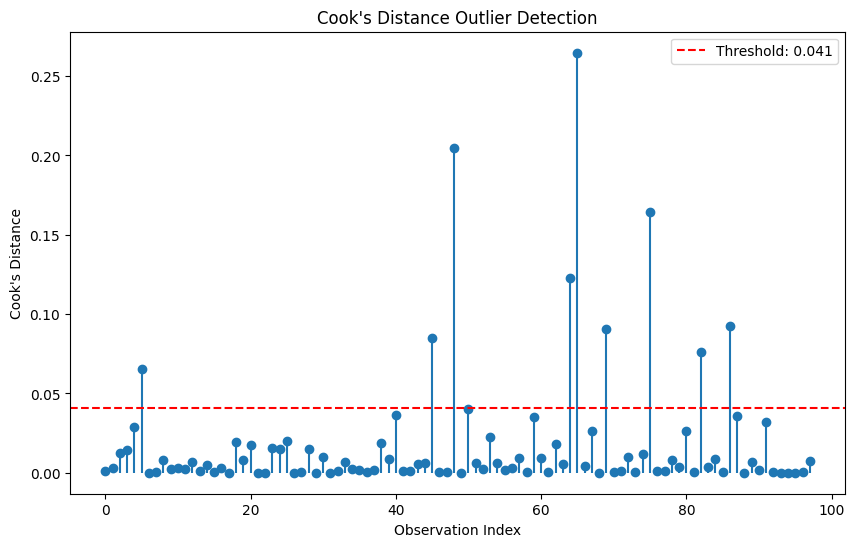

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt



# Define predictor (X) and response (y) variables
X = scaled_X.iloc[:, :-1]  # Exclude last column (predictor variable)
y = scaled_X.iloc[:, -1]   # Only the last column (predictor variable)



# Fit the model using statsmodels for detailed diagnostics
X_with_intercept = sm.add_constant(X)  # Adding an intercept term
model_sm = sm.OLS(y, X_with_intercept).fit()

# Calculate Cook's distance using OLSInfluence
influence = OLSInfluence(model_sm)
cooks_d = influence.cooks_distance[0]

# Define the number of observations in the dataset
n = len(y)

# Calculate the threshold for Cook's distance
outliers_threshold = 4 / n

# Plot Cook's distances
plt.figure(figsize=(10, 6))
plt.stem(cooks_d, basefmt=" ")
plt.title('Cook\'s Distance Outlier Detection')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.axhline(y=outliers_threshold, color='r', linestyle='--', label=f'Threshold: {outliers_threshold:.3f}')
plt.legend()
plt.show()

# Identify outliers based on Cook's distance
outliers = cooks_d > outliers_threshold

# Remove outliers from the dataset
data_cleaned = scaled_X.loc[~outliers]


In [86]:
X = X.loc[~outliers]
X.shape

(89, 19)

In [72]:
X.to_excel("V4data.xlsx")

In [88]:
data = X

In [90]:
data = data.iloc[:,1:]

In [92]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the columns to be scaled
columns_to_scale = ['Pop2010', 'OHU2010', 'medianincome']

# Initializing the scaler
scaler = MinMaxScaler()

# Scaling the selected columns
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Displaying the first few rows of the scaled data
data_scaled.head()


,Pop2010,OHU2010,lapophalf,lalowihalf,laseniorshalf,lawhitehalf,lablackhalf,lahisphalf,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractHispanic,TractHUNV,TractSNAP,medianincome,Overall Food Insecurity Rate
0,0.239344,0.248445,0.838501,0.789945,0.810017,0.856388,0.801713,0.786946,0.402760,0.231352,0.145162,0.726689,0.180334,0.098226,0.056280,0.155496,0.021663,0.114
1,0.057962,0.058377,0.936516,0.948627,0.903454,0.940738,0.886656,0.896697,0.376015,0.227243,0.151272,0.895855,0.054922,0.043040,0.034523,0.121041,0.116683,0.116
2,0.013344,0.015489,0.956729,0.977289,0.947999,0.961987,0.936469,0.906992,0.474675,0.200359,0.206544,0.922277,0.012550,0.090004,0.038719,0.174882,0.316223,0.158
3,0.015875,0.016085,0.996766,1.039605,0.995725,0.997638,0.995952,0.999995,0.447118,0.251425,0.139170,0.387191,0.572910,0.026124,0.100570,0.164660,0.289866,0.125
4,0.011158,0.013453,0.960419,0.947398,0.958095,0.963855,0.927710,0.862377,0.442960,0.201741,0.205689,0.963458,0.002632,0.035834,0.071528,0.195384,0.360440,0.131


In [96]:
# Removing rows with any missing values
data_no_na = data_scaled.dropna()

# Displaying the first few rows of the data after removing rows with missing values
data_no_na.isna().sum()


Pop2010                         0
OHU2010                         0
lapophalf                       0
lalowihalf                      0
laseniorshalf                   0
lawhitehalf                     0
lablackhalf                     0
lahisphalf                      0
TractLOWI                       0
TractKids                       0
TractSeniors                    0
TractWhite                      0
TractBlack                      0
TractHispanic                   0
TractHUNV                       0
TractSNAP                       0
medianincome                    0
Overall Food Insecurity Rate    0
dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separating the target variable and features
X = data_no_na.drop(['Overall Food Insecurity Rate'], axis=1)
y = data_no_na['Overall Food Insecurity Rate']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_regressor.predict(X_test)

# Calculating R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(0.690983375903935, 0.010724159381715852)

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]    # Minimum number of samples required to be at a leaf node
}

# Initialize the regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_

# Output the best parameters
print("Best parameters found: ", best_params)
# Using the best parameters from the hypothetical optimization to re-train the model
optimized_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
optimized_rf.fit(X_train, y_train)

# Making predictions with the optimized model
optimized_y_pred = optimized_rf.predict(X_test)

# Calculating R^2 and RMSE for the optimized model
optimized_r2 = r2_score(y_test, optimized_y_pred)
optimized_rmse = np.sqrt(mean_squared_error(y_test, optimized_y_pred))

optimized_r2, optimized_rmse

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


(0.703272458813583, 0.010508754995861007)

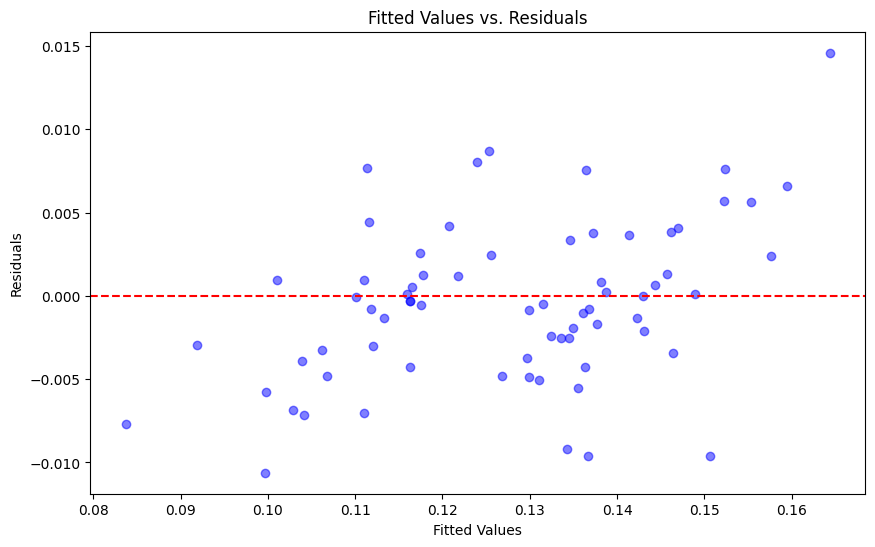

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10

In [103]:
import matplotlib.pyplot as plt

# Assuming rf_regressor is your trained Random Forest regressor
y_train_pred = rf_regressor.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()


In [119]:
from sklearn.preprocessing import PolynomialFeatures
# Perform correlation analysis between predictors and the response variable
correlations = X_train.corrwith(y_train).abs()

# Select top n predictors with the highest correlation with the response variable
# For illustration, let's choose the top 5 predictors
top_n_predictors = correlations.sort_values(ascending=False).index[1:10]  # Exclude the response variable itself

# Generate interaction terms only among the selected predictors
X_selected = data_cleaned[top_n_predictors]
poly_selected = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_selected_interacted = poly_selected.fit_transform(X_selected)

# Fit the model using the selected interacted terms
model_selected_interacted = sm.OLS(data_cleaned.iloc[:, -1], sm.add_constant(X_selected_interacted)).fit()

# Display the summary of the regression model with the selected interaction terms
model_selected_interacted_summary = model_selected_interacted.summary()
model_selected_interacted_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Overall Food Insecurity Rate   R-squared:                       0.843
Model:                                      OLS   Adj. R-squared:                  0.675
Method:                           Least Squares   F-statistic:                     5.008
Date:                          Fri, 05 Apr 2024   Prob (F-statistic):           3.07e-07
Time:                                  02:35:10   Log-Likelihood:                 301.93
No. Observations:                            88   AIC:                            -511.9
Df Residuals:                                42   BIC:                            -397.9
Df Model:                                    45                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0293      1.107      0.930      0.358      -1.204       3.263
x1            -0.3139      4.909     -0.064      0.949     -10.220       9.592
x2             1.1973      3.384      0.354      0.725      -5.632       8.027
x3            -0.6554      1.222     -0.536      0.595      -3.122       1.811
x4            56.6056     37.365      1.515      0.137     -18.799     132.010
x5           -54.2006     37.010     -1.464      0.151    -128.891      20.489
x6            -1.1000      5.159     -0.213      0.832     -11.511       9.311
x7            -1.0963      1.143     -0.959      0.343      -3.403       1.210
x8            -1.7692      1.301     -1.360      0.181      -4.394       0.855
x9            -1.4910      1.362     -1.095      0.280      -4.240       1.258
x10            2.9426      3.269      0.900      0.373      -3.654       9.539
x11           -4.9437      1.516     -3.261      0.002      -8.003      -1.885
x12          -35.5539     38.662     -0.920      0.363    -113.578      42.470
x13           29.6906     37.447      0.793      0.432     -45.881     105.262
x14          -11.2391      4.770     -2.356      0.023     -20.866      -1.612
x15            7.5108      5.381      1.396      0.170      -3.349      18.370
x16            6.6555      5.490      1.212      0.232      -4.425      17.736
x17            2.1228      4.885      0.435      0.666      -7.735      11.981
x18           -0.5810      1.025     -0.567      0.574      -2.651       1.488
x19           23.2901     25.985      0.896      0.375     -29.151      75.731
x20          -24.8175     25.414     -0.977      0.334     -76.104      26.469
x21           -4.5776      2.940     -1.557      0.127     -10.512       1.356
x22           -0.1114      3.507     -0.032      0.975      -7.188       6.966
x23           -0.6252      3.512     -0.178      0.860      -7.713       6.463
x24            5.9514      3.693      1.611      0.115      -1.502      13.404
x25           -4.6143      4.639     -0.995      0.326     -13.976       4.747
x26            4.9406      4.535      1.089      0.282      -4.212      14.093
x27            2.0220      0.988      2.047      0.047       0.028       4.016
x28            0.6327      1.251      0.506      0.616      -1.892       3.157
x29            1.1140      1.334      0.835      0.408      -1.578       3.806
x30            1.5396      1.086      1.417      0.164      -0.653       3.732
x31           -0.0302      0.129     -0.233      0.817      -0.291       0.231
x32            8.4801     14.581      0.582      0.564     -20.946      37.906
x33          -57.6873     38.549     -1.496      0.142    -135.481      20.107
x34          -55.1057     38.616     -1.427      0

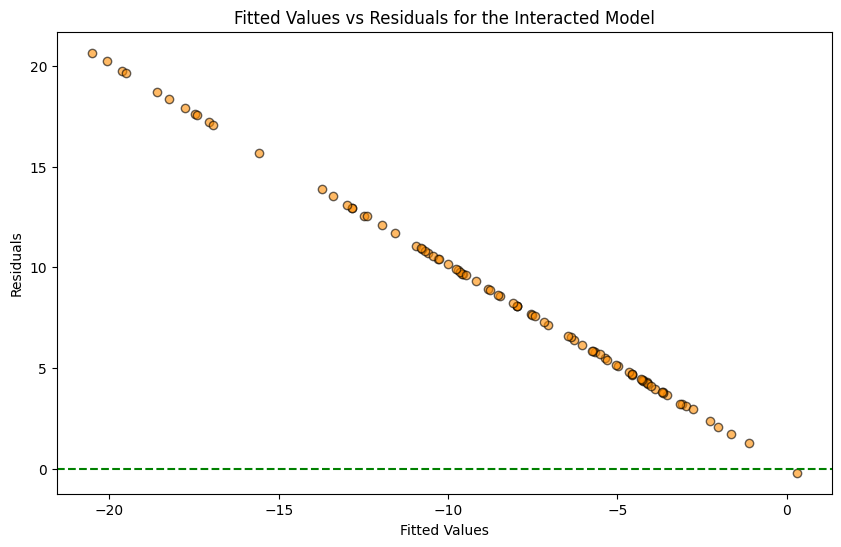

In [112]:
# Predicting with the interacted model
y_pred_interacted = model_selected_interacted.predict(X_interacted_const)

# Calculating residuals for the interacted model
residuals_interacted = y - y_pred_interacted

# Plotting fitted values vs residuals for the interacted model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_interacted, residuals_interacted, color='darkorange', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals for the Interacted Model')
plt.show()


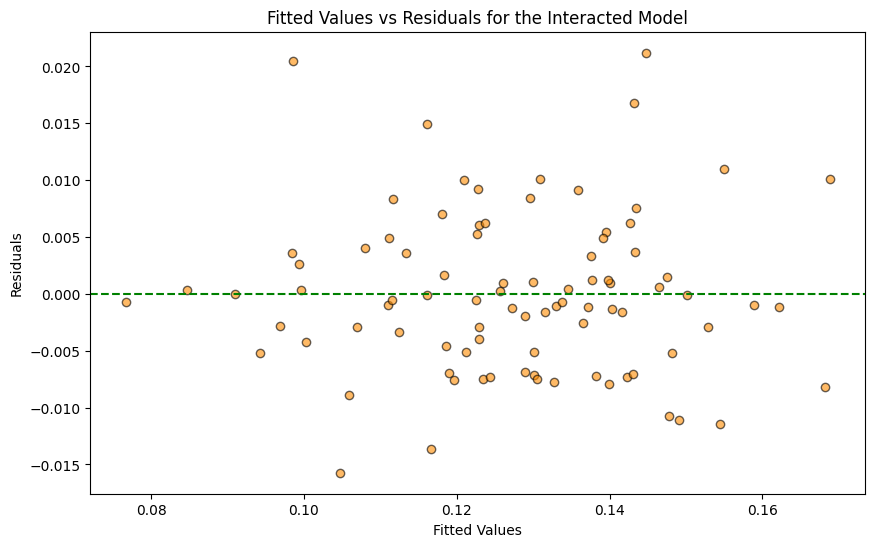

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_interacted, residuals_interacted, color='darkorange', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals for the Interacted Model')
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 3],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)  # Ensure X_train is prepared for the model, including any feature engineering like interaction terms

# Best model
best_gb_model = grid_search_gb.best_estimator_


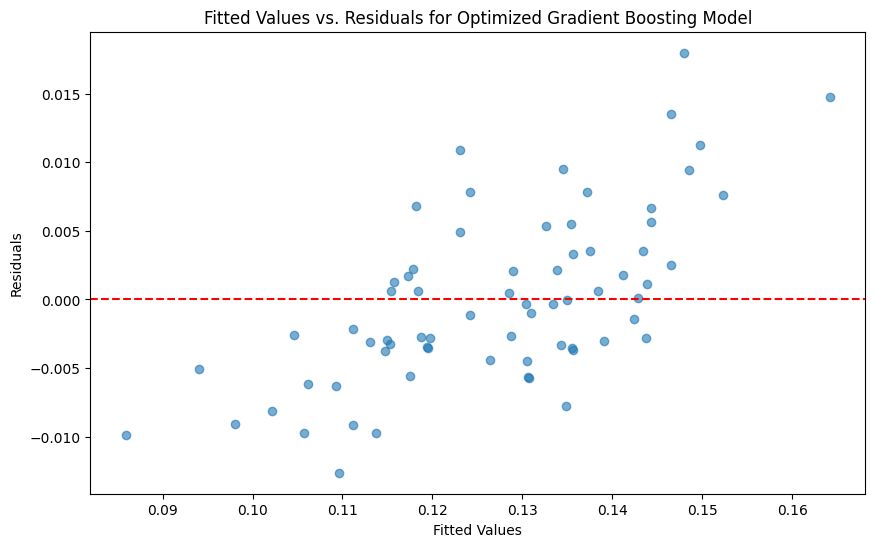

R^2: 0.900505032268504
RMSE: 0.006260229943194424


In [125]:

# Predicting with the optimized model
y_pred_optimized = best_gb_model.predict(X_train)  # Or X_test, depending on your preference

# Calculating residuals
residuals = y_train - y_pred_optimized  # Use y_test if you're predicting on X_test

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, residuals, alpha=0.6)
plt.axhline(y=0, linestyle='--', color='r')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals for Optimized Gradient Boosting Model')
plt.show()

# Calculating and printing R^2 and RMSE
r2 = r2_score(y_train, y_pred_optimized)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_optimized))
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")


In [127]:
feature_importance = best_gb_model.feature_importances_

# Assuming you have a DataFrame X_train that includes the feature names
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = feature_importance
# Sort the features by importance
features_sorted = features.sort_values(by=['Importance'], ascending=False).reset_index(drop=True)

print(features_sorted)

          Feature  Importance
0       TractLOWI    0.593165
1       TractSNAP    0.100525
2    TractSeniors    0.078721
3       TractHUNV    0.051302
4      lalowihalf    0.044116
5       TractKids    0.028766
6      TractBlack    0.022401
7      TractWhite    0.020335
8     lawhitehalf    0.017494
9   TractHispanic    0.017125
10     lahisphalf    0.011155
11    lablackhalf    0.004717
12   medianincome    0.003262
13      lapophalf    0.002683
14  laseniorshalf    0.002430
15        Pop2010    0.000969
16        OHU2010    0.000832


In [129]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming best_gb_regressor is your optimized model and is already fitted
y_test_pred = best_gb_model.predict(X_test)  # Ensure X_test is prepared similarly to X_train

# Calculating R^2 and RMSE
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R^2 on test data: {r2_test}")
print(f"RMSE on test data: {rmse_test}")

R^2 on test data: 0.7126581014498494
RMSE on test data: 0.010341220928522132
